# Análise Exploratória de Dados: Risco de Crédito Alemão

## 1. Introdução e Contexto de Negócio
Este estudo de caso foca na análise de risco de crédito, um pilar fundamental para instituições financeiras.   
O objetivo é identificar padrões de comportamento e características sociodemográficas que discriminem bons de maus pagadores.

**Objetivo Técnico:**
Validar as premissas para a construção de um pipeline de **MLOps** robusto utilizando o framework **Kedro**, garantindo que a seleção de atributos seja guiada por evidências estatísticas.

**Dados** 

https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data

**Métricas de Interesse:**
* **Default Rate (Taxa de Inadimplência):** Proporção de clientes classificados como 'Mau Pagador'.
* **Information Value (IV):** Capacidade preditiva de cada variável.

In [1]:
# Célula de código
%load_ext kedro.ipython
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definindo estilo visual padrão para os gráficos (Padrão Corporativo)
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)

# Carregando os dados já processados (com os labels legíveis que criamos no nodes.py)
df = catalog.load("german_credit_intermediate")

# Visualização rápida
print(f"Dataset carregado com {df.shape[0]} registros e {df.shape[1]} colunas.")
df.head()

[02/02/26 12:34:34] INFO     Using                                                                  ]8;id=927608;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/framework/project/__init__.py\__init__.py]8;;\:]8;id=270781;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/framework/project/__init__.py#269\269]8;;\
                             '/mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/                
                             site-packages/kedro/framework/project/rich_logging.yml' as logging                    
                             configuration.                                                                        

                    INFO     Registered line magic '%reload_kedro'                                   ]8;id=710282;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=532153;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#64\64]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=95487;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=857811;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#66\66]8;;\

                    INFO     Resolved project path as:                                              ]8;id=755210;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=994457;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#181\181]8;;\
                             /mnt/d/Documentos/Programação/credit-risk-kedro/german-credit-risk.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[02/02/26 12:34:56] INFO     Kedro project German Credit Risk                                       ]8;id=979214;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=755650;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#147\147]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=614342;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=463860;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#148\148]8;;\
                             'pipelines'                                                                           

[02/02/26 12:35:00] INFO     Registered line magic 'run_viz'                                        ]8;id=614379;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py\__init__.py]8;;\:]8;id=986818;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/ipython/__init__.py#154\154]8;;\

[02/02/26 12:35:16] INFO     Loading data from german_credit_intermediate (ParquetDataset)...  ]8;id=108275;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=84312;file:///mnt/d/Documentos/Programação/credit-risk-kedro/.venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#1048\1048]8;;\

Dataset carregado com 1000 registros e 21 colunas.


,status_checking,duration,credit_history,purpose,credit_amount,savings,employment_since,installment_rate,personal_status,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,< 0 DM,6,critical account/other credits existing,radio/television,1169,unknown/no savings account,>= 7 years,4,male: single,none,...,real estate,67,none,own,2,skilled employee,1,yes,yes,0
1,0 <= ... < 200 DM,48,existing credits paid duly till now,radio/television,5951,< 100 DM,1 <= ... < 4 years,2,female: divorced/separated/married,none,...,real estate,22,none,own,1,skilled employee,1,none,yes,1
2,no checking account,12,critical account/other credits existing,education,2096,< 100 DM,4 <= ... < 7 years,2,male: single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,0
3,< 0 DM,42,existing credits paid duly till now,furniture/equipment,7882,< 100 DM,4 <= ... < 7 years,2,male: single,guarantor,...,building society savings/life insurance,45,none,for free,1,skilled employee,2,none,yes,0
4,< 0 DM,24,delay in paying off in the past,car (new),4870,< 100 DM,1 <= ... < 4 years,3,male: single,none,...,unknown/no property,53,none,for free,2,skilled employee,2,none,yes,1


In [2]:
## Rocar caso seja necessário re3carregar o contexto Kedro
# %reload_kedro

## 2. Diagnóstico da Variável Alvo
Antes de analisar os preditores, precisamos entender a distribuição da nossa classe alvo:
* **0 (Bom):** Cliente adimplente.
* **1 (Mau):** Cliente inadimplente (Default).

[02/02/26 12:35:17] WARNING  /tmp/ipykernel_3523/2362215253.py:8: UserWarning: set_ticklabels()     ]8;id=182218;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=239246;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             should only be used with a fixed number of ticks, i.e. after                          
                             set_ticks() or using a FixedLocator.                                                  
                               ax.set_xticklabels(['Bom Pagador (0)', 'Mau Pagador (1)'])                          
                                                                                                                   

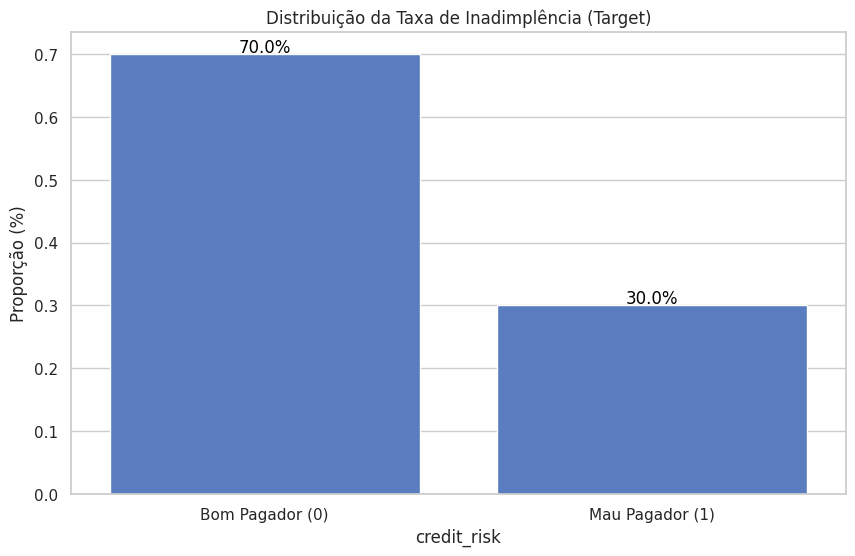

In [3]:
# Cálculo da distribuição
target_dist = df['credit_risk'].value_counts(normalize=True).sort_index()

# Gráfico de Barras com Rótulos
ax = sns.barplot(x=target_dist.index, y=target_dist.values)
ax.set_title('Distribuição da Taxa de Inadimplência (Target)')
ax.set_ylabel('Proporção (%)')
ax.set_xticklabels(['Bom Pagador (0)', 'Mau Pagador (1)'])

# Adicionando a porcentagem em cima das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

## 3. Análise de Preditores Categóricos
Nesta seção, exploramos como diferentes características (como o propósito do crédito ou o status da conta) influenciam a probabilidade de inadimplência. 

Utilizamos a **Taxa de Default por Categoria** para identificar grupos de alto risco, o que fundamenta a seleção de variáveis para o modelo final.

In [4]:
def plot_default_rate(df, column, title):
    """
    Gera um gráfico de barras mostrando a taxa de inadimplência por categoria.
    """
    # Calcula a taxa de default (média do target credit_risk) por categoria
    default_rates = df.groupby(column)['credit_risk'].mean().sort_values(ascending=False)
    
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x=default_rates.index, y=default_rates.values)
    
    # Linha de referência da média global do dataset
    plt.axhline(df['credit_risk'].mean(), color='red', linestyle='--', label='Média Global')
    
    plt.title(f'Taxa de Inadimplência por {title}')
    plt.ylabel('Taxa de Default (Proporção)')
    plt.xticks(rotation=45)
    plt.legend()

    # Adicionando rótulos
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    
    plt.show()

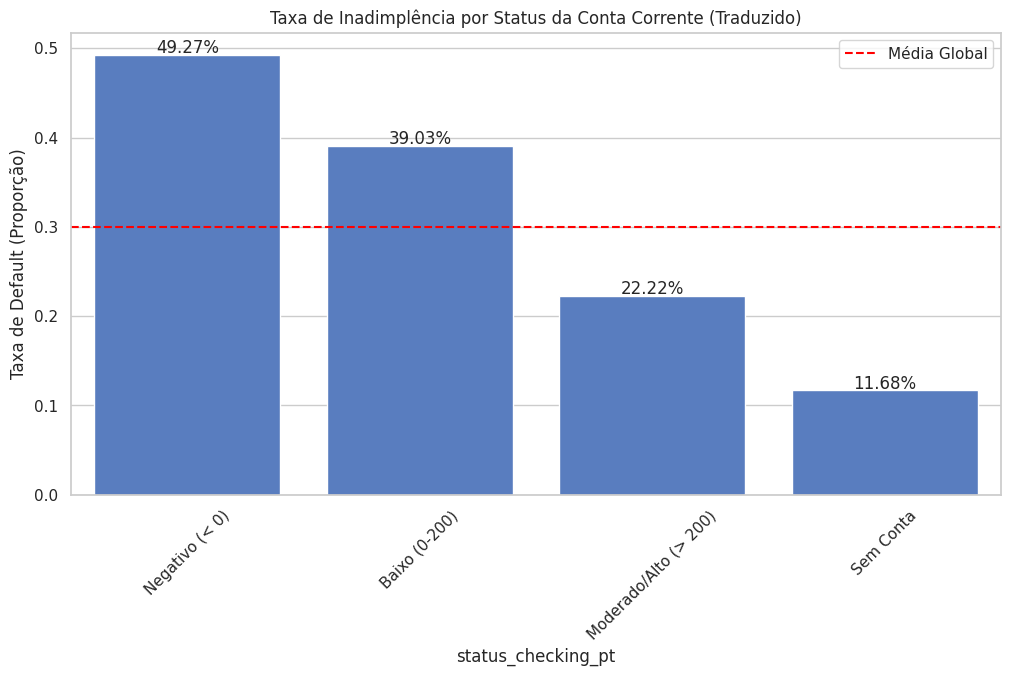

In [5]:
# Criando um dicionário de tradução
checking_map = {
    '< 0 DM': 'Negativo (< 0)',
    '0 <= ... < 200 DM': 'Baixo (0-200)',
    '>= 200 DM / salary assignments': 'Moderado/Alto (> 200)',
    'no checking account': 'Sem Conta'
}

# Aplicando a tradução temporariamente para o gráfico
df_plot = df.copy()
df_plot['status_checking_pt'] = df_plot['status_checking'].map(checking_map)

# Chamando a função que criamos com a coluna traduzida
plot_default_rate(df_plot, 'status_checking_pt', 'Status da Conta Corrente (Traduzido)')

Análise: Status da Conta Corrente (status_checking)
A variável status_checking representa o saldo da conta corrente do cliente no momento da solicitação. No setor bancário, este é historicamente um dos preditores mais fortes de inadimplência.

Tradução dos Status:

< 0 DM: Conta com saldo negativo (overdrawn).
0 <= ... < 200 DM: Saldo baixo (até 200 Deutsche Marks).
>= 200 DM: Saldo moderado a alto.
no checking account: O cliente não possui conta corrente nesta instituição.
Insight de Negócio:
Observamos que clientes com saldo negativo (< 0 DM) apresentam uma taxa de default significativamente superior à média global.
Curiosamente, clientes sem conta corrente nesta instituição também podem apresentar um risco elevado, o que sugere a necessidade de políticas de crédito mais rigorosas para novos entrantes sem histórico interno.

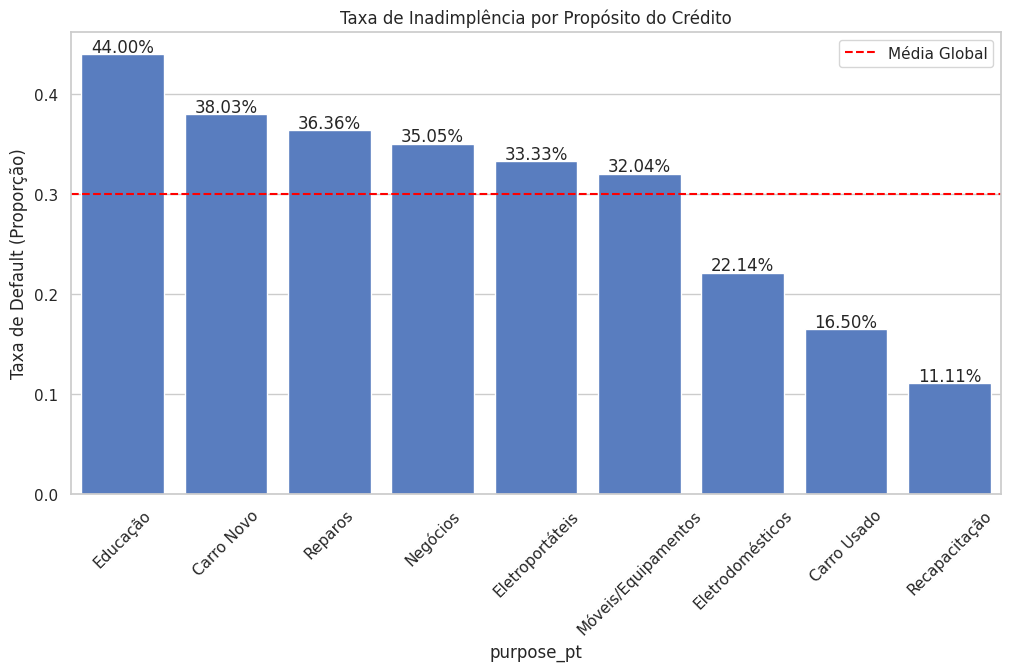

In [6]:
# Dicionário de tradução para Propósito
purpose_map = {
    'car (new)': 'Carro Novo',
    'car (used)': 'Carro Usado',
    'furniture/equipment': 'Móveis/Equipamentos',
    'radio/television': 'Eletrodomésticos',
    'domestic appliances': 'Eletroportáteis',
    'repairs': 'Reparos',
    'education': 'Educação',
    'business': 'Negócios',
    'vacation/others': 'Férias/Outros',
    'retraining': 'Recapacitação'
}

df_plot['purpose_pt'] = df_plot['purpose'].map(purpose_map)
plot_default_rate(df_plot, 'purpose_pt', 'Propósito do Crédito')

### Análise: Propósito do Empréstimo (purpose)

O propósito ajuda a entender o risco associado ao bem financiado. Bens com maior liquidez (como carros) costumam ter dinâmicas de risco diferentes de serviços (como educação).

**Insight de Negócio:**
Historicamente, financiamentos para **Educação** ou **Pequenos Negócios** podem apresentar taxas de inadimplência mais voláteis no dataset German Credit. Já o financiamento de **Carros Usados** tende a apresentar um risco menor comparado a outras categorias de consumo, o que pode influenciar na estratégia de precificação baseada em risco (Risk-Based Pricing).

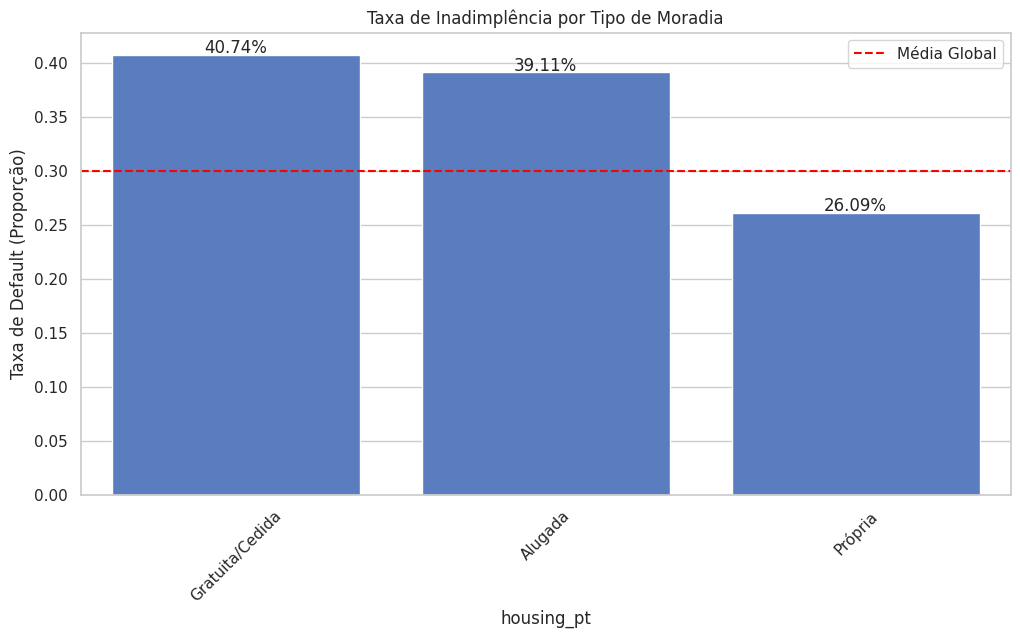

In [7]:
# Dicionário de tradução para Moradia
housing_map = {
    'rent': 'Alugada',
    'own': 'Própria',
    'for free': 'Gratuita/Cedida'
}

df_plot['housing_pt'] = df_plot['housing'].map(housing_map)
plot_default_rate(df_plot, 'housing_pt', 'Tipo de Moradia')

### Análise: Tipo de Moradia (housing)

Esta variável fornece pistas sobre o patrimônio e os custos fixos do cliente. No setor bancário, a posse de imóvel próprio costuma ser associada a um menor risco de crédito.

**Tradução dos Status:**
* **Alugada:** Cliente paga aluguel mensal.
* **Própria:** Cliente é proprietário do imóvel onde reside.
* **Gratuita/Cedida:** Mora com parentes ou em imóvel cedido pela empresa/governo.

**Insight de Negócio:**
Clientes com **imóvel próprio** geralmente apresentam as menores taxas de default, servindo como uma âncora de estabilidade. Já a categoria **Gratuita/Cedida** pode apresentar maior volatilidade, muitas vezes associada a perfis mais jovens ou com menor acúmulo de patrimônio, o que exige uma análise complementar de renda.

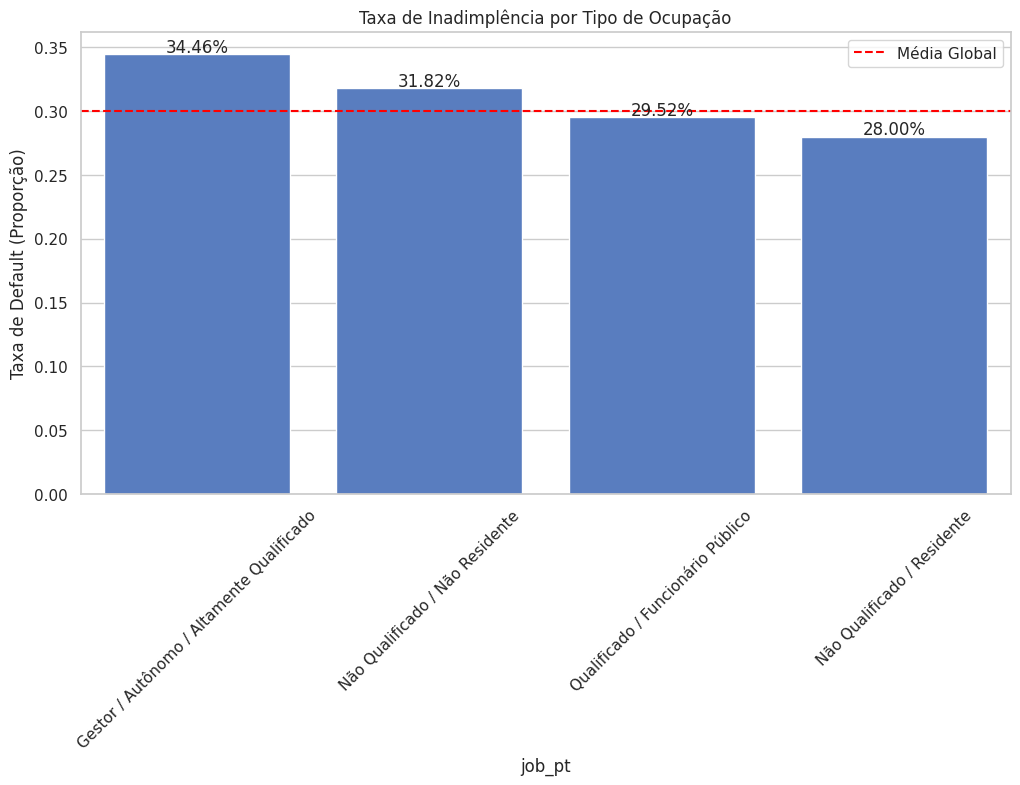

In [8]:
# Dicionário de tradução para Ocupação
job_map = {
    'unemployed/unskilled non-resident': 'Não Qualificado / Não Residente',
    'unskilled resident': 'Não Qualificado / Residente',
    'skilled employee': 'Qualificado / Funcionário Público',
    'management/highly qualified': 'Gestor / Autônomo / Altamente Qualificado'
}

df_plot['job_pt'] = df_plot['job'].map(job_map)
plot_default_rate(df_plot, 'job_pt', 'Tipo de Ocupação')

### Análise: Tipo de Ocupação (job)

A ocupação profissional é um proxy para a estabilidade da renda.

**Tradução dos Status:**
* **Não Qualificado / Não Residente:** Trabalhos braçais ou temporários sem residência fixa.
* **Não Qualificado / Residente:** Trabalhos sem exigência técnica, mas com residência estabelecida.
* **Qualificado / Funcionário Público:** Profissionais técnicos ou funcionários de carreira.
* **Gestor / Autônomo / Altamente Qualificado:** Cargos de liderança, oficiais ou profissionais liberais de alta renda.

**Insight de Negócio:**
Embora se espere que cargos de gestão tenham menor risco, a categoria de **Autônomos** pode apresentar taxas de default maiores devido à instabilidade do fluxo de caixa. A estabilidade dos **Funcionários Públicos** costuma ser um diferencial positivo na modelagem de **Probability of Default (PD)**.

## 4. Análise de Variáveis Numéricas
Nesta seção, analisamos o comportamento das variáveis contínuas: **Idade**, **Valor do Crédito** e **Duração**.   
O objetivo é verificar se clientes mais jovens ou empréstimos de valores mais elevados apresentam correlação direta com uma maior probabilidade de inadimplência (Default).


[02/02/26 12:35:19] WARNING  /tmp/ipykernel_3523/1115148558.py:16: UserWarning: set_ticklabels()    ]8;id=342239;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=181912;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             should only be used with a fixed number of ticks, i.e. after                          
                             set_ticks() or using a FixedLocator.                                                  
                               axes[1].set_xticklabels(['Bom (0)', 'Mau (1)'])                                     
                                                                                                                   

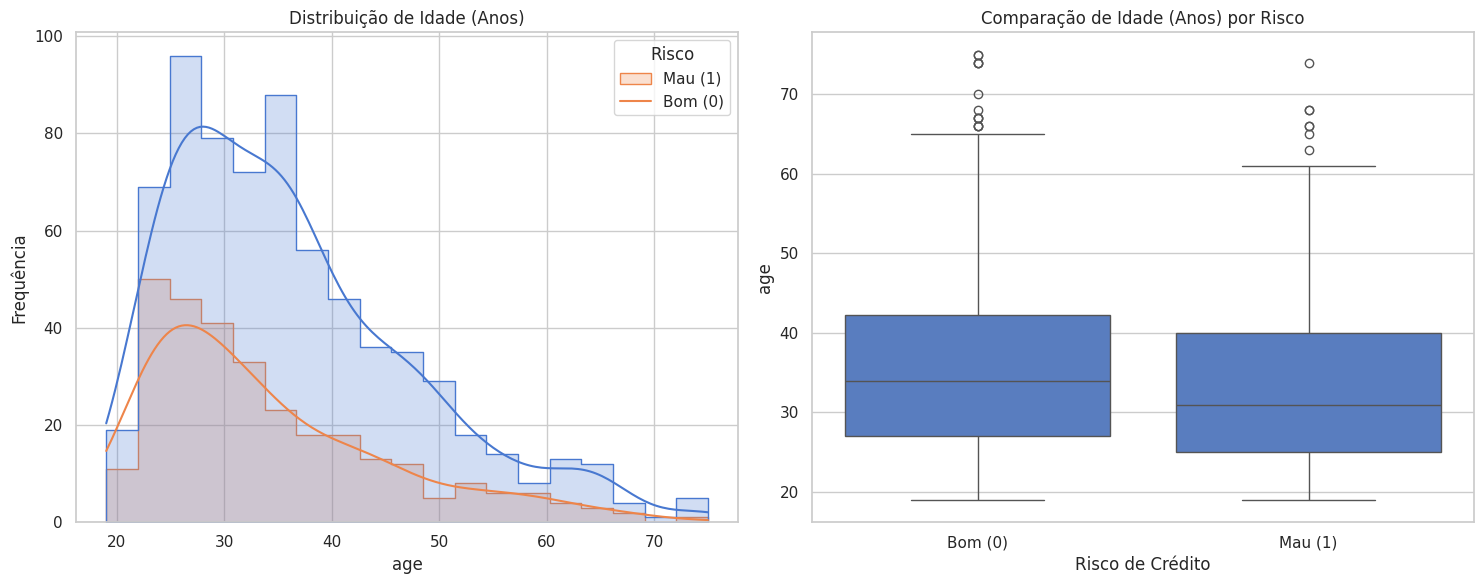

[02/02/26 12:35:20] WARNING  /tmp/ipykernel_3523/1115148558.py:16: UserWarning: set_ticklabels()    ]8;id=323764;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=477841;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             should only be used with a fixed number of ticks, i.e. after                          
                             set_ticks() or using a FixedLocator.                                                  
                               axes[1].set_xticklabels(['Bom (0)', 'Mau (1)'])                                     
                                                                                                                   

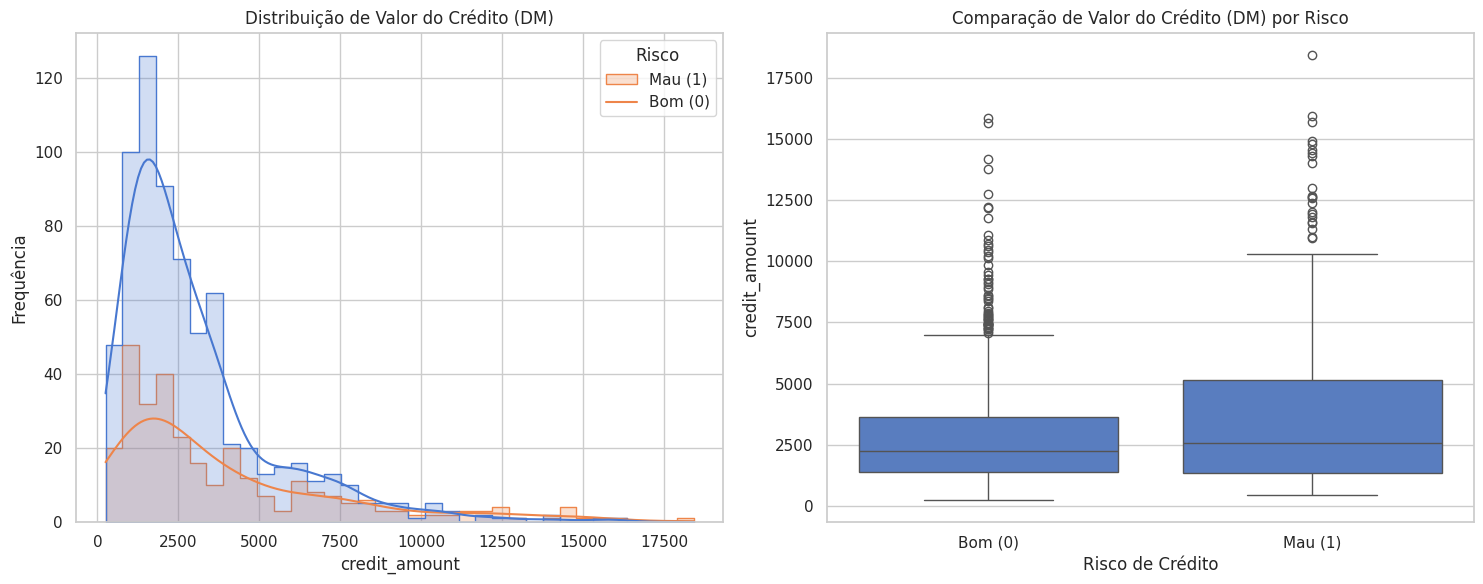

In [9]:
def plot_numeric_analysis(df, column, title):
    """
    Gera um Histograma e um Boxplot comparativo para variáveis numéricas.
    """
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Histograma (Distribuição Geral)
    sns.histplot(data=df, x=column, hue='credit_risk', kde=True, element="step", ax=axes[0])
    axes[0].set_title(f'Distribuição de {title}')
    axes[0].set_ylabel('Frequência')
    axes[0].legend(title='Risco', labels=['Mau (1)', 'Bom (0)'])

    # 2. Boxplot (Comparação de Médias e Outliers)
    sns.boxplot(data=df, x='credit_risk', y=column, ax=axes[1])
    axes[1].set_title(f'Comparação de {title} por Risco')
    axes[1].set_xticklabels(['Bom (0)', 'Mau (1)'])
    axes[1].set_xlabel('Risco de Crédito')

    plt.tight_layout()
    plt.show()

# Análise de Idade
plot_numeric_analysis(df, 'age', 'Idade (Anos)')

# Análise de Valor do Crédito
plot_numeric_analysis(df, 'credit_amount', 'Valor do Crédito (DM)')

### Análise: Idade (age)
A idade é um fator de estabilidade. Observamos que o risco tende a ser ligeiramente superior em clientes mais jovens (abaixo dos 30 anos).  
Para um banco, isso pode indicar a necessidade de garantias complementares ou limites iniciais mais conservadores para este perfil.

### Análise: Valor do Crédito (credit_amount)
Notamos que empréstimos de valores muito elevados apresentam uma cauda longa de inadimplência.   
O Boxplot revela que os "Maus Pagadores" (1) possuem uma mediana de valor solicitado superior aos "Bons Pagadores" (0), sugerindo que quanto maior o ticket médio, maior deve ser o rigor da análise de capacidade de pagamento.

[02/02/26 12:35:21] WARNING  /tmp/ipykernel_3523/1115148558.py:16: UserWarning: set_ticklabels()    ]8;id=26190;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=561200;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             should only be used with a fixed number of ticks, i.e. after                          
                             set_ticks() or using a FixedLocator.                                                  
                               axes[1].set_xticklabels(['Bom (0)', 'Mau (1)'])                                     
                                                                                                                   

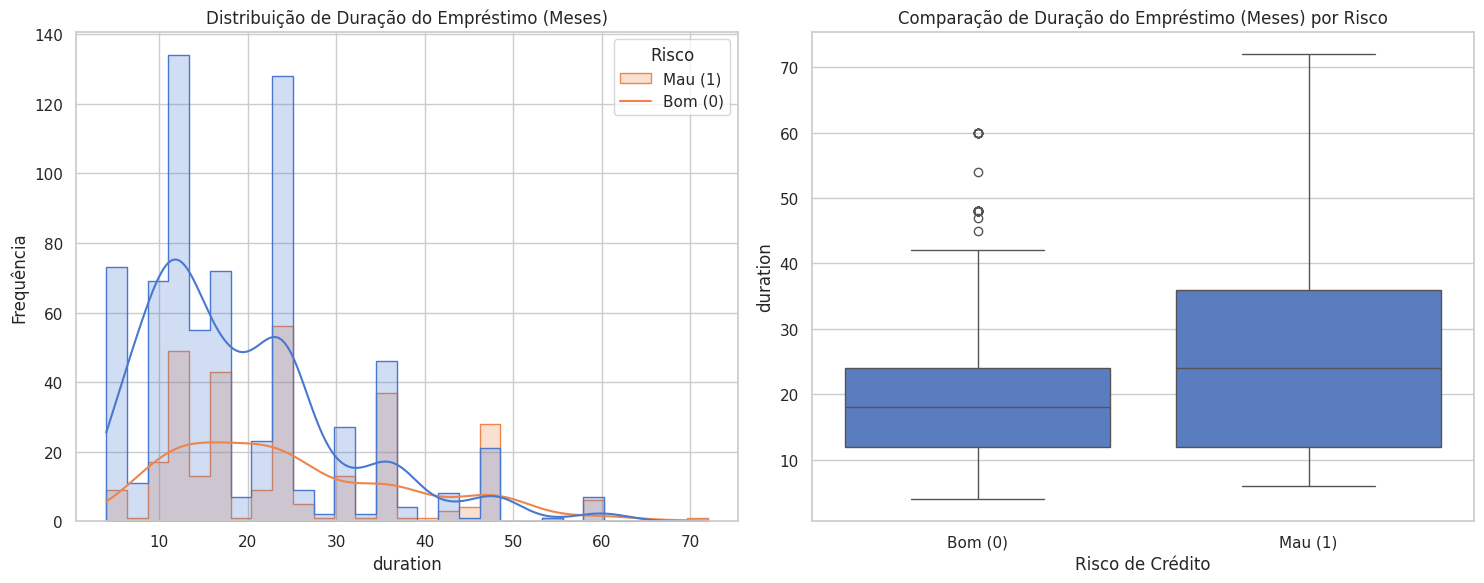

In [10]:
# Análise de Duração (Meses)
plot_numeric_analysis(df, 'duration', 'Duração do Empréstimo (Meses)')

### 🔍 Análise: Duração (duration)

**Insight de Negócio:**
Existe uma relação clara entre o prazo do contrato e a inadimplência.  
Contratos de curto prazo (até 12 meses) apresentam uma densidade muito maior de "Bons Pagadores".  
À medida que a duração avança para além de 24 meses, a proporção de "Maus Pagadores" aumenta, sugerindo que o risco de crédito é sensível à volatilidade do cenário macroeconômico em prazos mais longos.

## 5 Matriz de Correlação e Conclusões
Nesta etapa, verificamos como as variáveis numéricas se relacionam entre si.

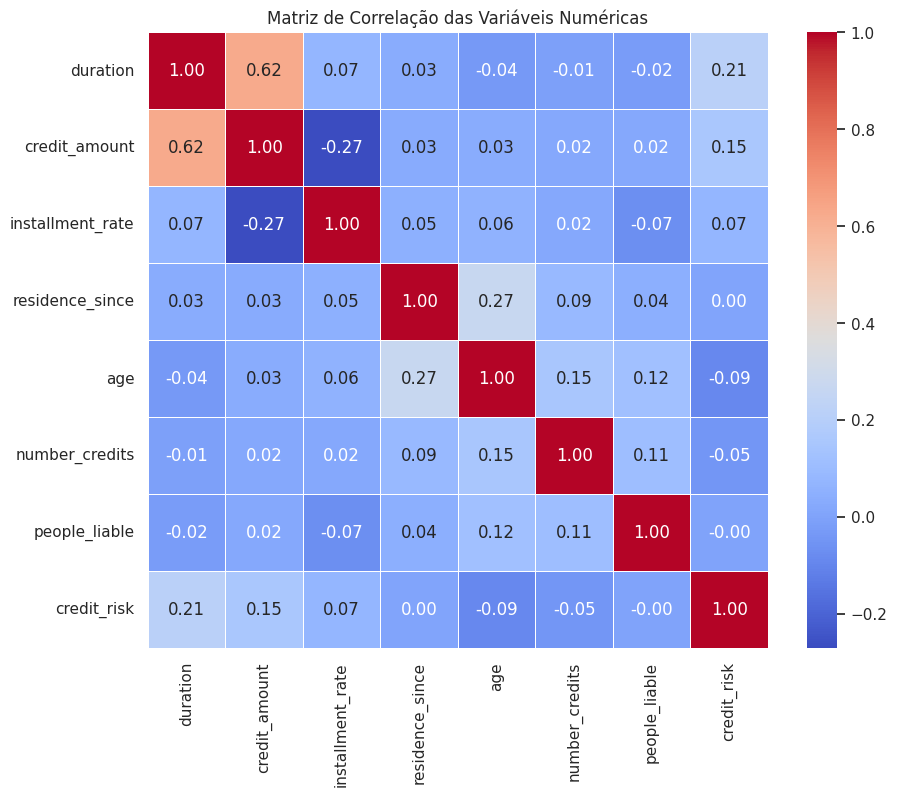

In [11]:
# Selecionando apenas as variáveis numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

# Gráfico de Calor (Heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## 6. Information Value (IV) e Seleção de Atributos
No setor bancário, o **Information Value (IV)** é uma das métricas mais robustas para quantificar o poder preditivo de uma variável em relação à inadimplência.  
Ele nos ajuda a filtrar ruídos e focar no que realmente importa para o modelo de **Probability of Default (PD)**.

**Critérios de Interpretação do IV:**
* **< 0.02:** Inútil para predição.
* **0.02 a 0.1:** Preditividade fraca.
* **0.1 a 0.3:** Preditividade média.
* **0.3 a 0.5:** Preditividade forte.
* **> 0.5:** Preditividade suspeita (pode indicar vazamento de dados).

[02/02/26 12:35:22] WARNING  /tmp/ipykernel_3523/2429822769.py:34: FutureWarning:                   ]8;id=914345;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=279617;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                                                                                                                   
                             Passing `palette` without assigning `hue` is deprecated and will be                   
                             removed in v0.14.0. Assign the `y` variable to `hue` and set                          
                             `legend=False` for the same effect.                                                   
                                                                                                                   
                               sns.barplot(x='IV', y='Feature', data=df_iv, palette='viridis')                     
                                                                                                                   

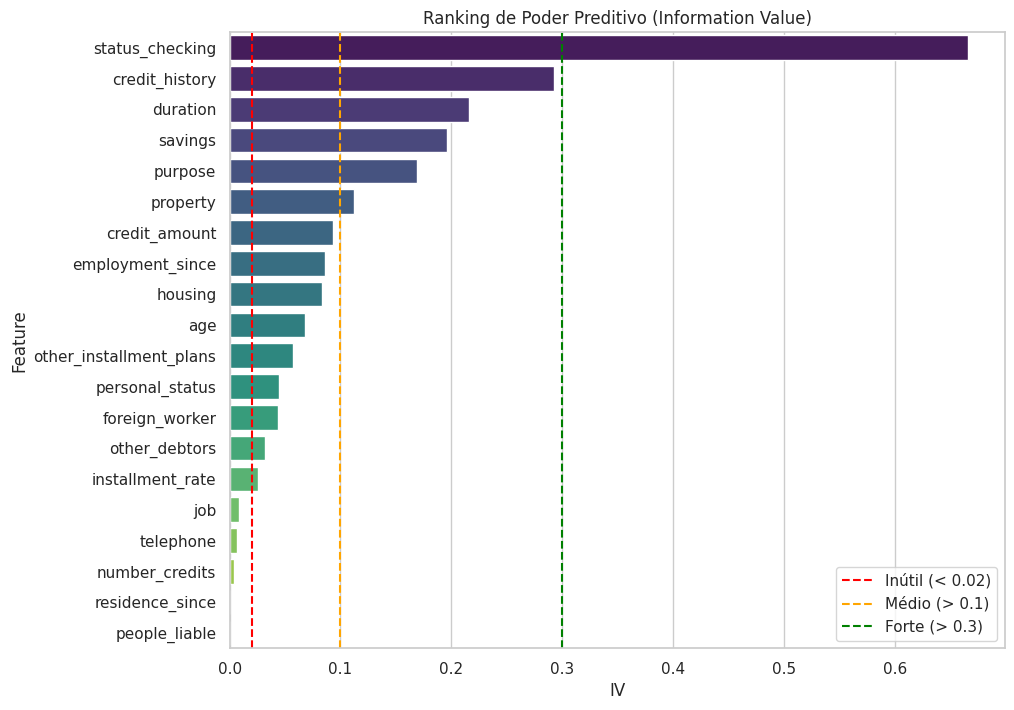

In [12]:
# Função para cálculo de IV e WoE
def calculate_iv_woe(df, target, feature):
    # Cria os bins (agrupamentos) para variáveis numéricas via decis (q=5 para simplificação)
    if df[feature].dtype != 'object':
        df[feature] = pd.qcut(df[feature], q=5, duplicates='drop').astype(str)
    
    # Agrupamento e cálculo de proporções
    stats = df.groupby(feature)[target].agg(['count', 'sum'])
    stats.columns = ['Total', 'Bad']
    stats['Good'] = stats['Total'] - stats['Bad']
    
    perc_bad = stats['Bad'] / stats['Bad'].sum()
    perc_good = stats['Good'] / stats['Good'].sum()
    
    # WoE e IV com correção para evitar log(0)
    stats['WoE'] = np.log((perc_good + 0.0001) / (perc_bad + 0.0001))
    stats['IV'] = (perc_good - perc_bad) * stats['WoE']
    
    return stats['IV'].sum()

# Processamento do ranking
iv_list = []
target_col = 'credit_risk'
features = [col for col in df.columns if col != target_col]

for feature in features:
    iv_value = calculate_iv_woe(df.copy(), target_col, feature)
    iv_list.append({'Feature': feature, 'IV': iv_value})

df_iv = pd.DataFrame(iv_list).sort_values(by='IV', ascending=False)

# Visualização do Poder Preditivo
plt.figure(figsize=(10, 8))
sns.barplot(x='IV', y='Feature', data=df_iv, palette='viridis')

# Linhas de referência técnica
plt.axvline(x=0.02, color='red', linestyle='--', label='Inútil (< 0.02)')
plt.axvline(x=0.1, color='orange', linestyle='--', label='Médio (> 0.1)')
plt.axvline(x=0.3, color='green', linestyle='--', label='Forte (> 0.3)')

plt.title('Ranking de Poder Preditivo (Information Value)')
plt.legend()
plt.show()

### Análise do Ranking de IV

Observamos que variáveis como `status_checking` e `credit_history` apresentam um IV elevado, confirmando sua posição como pilares da estratégia de crédito. 

**Decisão de Engenharia (MLOps):**
Com base neste ranking, o pipeline do **Kedro** utilizará um threshold de **0.02**.  
Variáveis que ficarem abaixo desta linha (como possivelmente `people_liable` ou `telephone`) serão descartadas automaticamente para reduzir a dimensionalidade e evitar o *overfitting*, mantendo o modelo enxuto e escalável.

## 7. Conclusões da Análise Exploratória

Após a análise detalhada, consolidamos os seguintes aprendizados para a fase de modelagem:

1.  **Preditores Dominantes**: `status_checking` e `credit_history` são os indicadores mais fortes de risco, validando a importância de manter labels legíveis para auditoria bancária.
2.  **Relação Valor x Prazo**: Existe uma correlação moderada entre `credit_amount` e `duration`. Empréstimos maiores costumam ser parcelados em mais vezes, o que aumenta o risco acumulado.
3.  **Perfil de Estabilidade**: A idade atua como um fator mitigador de risco; clientes com maior tempo de residência e idade tendem a ser mais estáveis no banco.
4.  **Base para o Kedro**: Os insights aqui obtidos justificam o uso de **Information Value (IV)** como critério de seleção, pois confirmam que algumas variáveis possuem um poder de separação de classes muito superior a outras.